# Data preparation

### 1. Function that combines all files of a specific extension from a given folder:

In [255]:
import pandas as pd
import numpy as np
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [256]:
def combine_files(ext, path_to_folder):
    files = glob.glob(path_to_folder + f"/*.{ext}")
    
    data_frame = pd.DataFrame() # create empty dataframe
    
    for file in files:
        df = pd.read_csv(file, index_col=None)
        data_frame = pd.concat([data_frame, df])
    return data_frame

In [257]:
data = combine_files(ext = 'csv', path_to_folder = 'athlete_events')

In [258]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
1,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,NaN
2,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 20 kilometres,NaN
3,91138,Anton Dmitriyevich Pantov,M,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014.0,Winter,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
4,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
5,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994.0,Winter,Lillehammer,Biathlon,Biathlon Men's 20 kilometres,NaN
6,91139,Dmitry Anatolyevich Pantov,M,28.0,190.0,85.0,Kazakhstan,KAZ,1998 Winter,1998.0,Winter,Nagano,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN
7,91139,Dmitry Anatolyevich Pantov,M,28.0,190.0,85.0,Kazakhstan,KAZ,1998 Winter,1998.0,Winter,Nagano,Biathlon,Biathlon Men's 20 kilometres,NaN
8,91139,Dmitry Anatolyevich Pantov,M,28.0,190.0,85.0,Kazakhstan,KAZ,1998 Winter,1998.0,Winter,Nagano,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
9,91139,Dmitry Anatolyevich Pantov,M,32.0,190.0,85.0,Kazakhstan,KAZ,2002 Winter,2002.0,Winter,Salt Lake City,Biathlon,Biathlon Men's 10 kilometres Sprint,NaN


# EDA

### 2. Check the correctness of the data:

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271115 entries, 0 to 22390
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271115 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271113 non-null  object 
 3   Age     261639 non-null  float64
 4   Height  210943 non-null  float64
 5   Weight  208239 non-null  float64
 6   Team    271112 non-null  object 
 7   NOC     271111 non-null  object 
 8   Games   271110 non-null  object 
 9   Year    271108 non-null  float64
 10  Season  271108 non-null  object 
 11  City    271108 non-null  object 
 12  Sport   271108 non-null  object 
 13  Event   271107 non-null  object 
 14  Medal   39782 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 33.1+ MB


### Replace string values into numbers

Count values in column **Season** and replace string values into numbers: **Summer = 0**, **Winter = 1**:

In [260]:
data['Season'].value_counts()

Summer    222544
Winter     48564
Name: Season, dtype: int64

In [261]:
data["Season"] = data["Season"].replace({'Summer':0, 'Winter':1})

Count values in column **Sex** and replace string values into numbers: **M = 0**, **F = 1**, **G = 2**:

In [262]:
data['Sex'].value_counts()

M    196588
F     74523
G         2
Name: Sex, dtype: int64

In [263]:
data["Sex"] = data["Sex"].replace({'M':0, 'F':1, 'G':2})

Count values in column **Medal** and replace string values into numbers: **Gold = 0**, **Silver = 1**, **Bronze = 2**:

In [264]:
data['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13115
Name: Medal, dtype: int64

In [265]:
data["Medal"] = data["Medal"].replace({'Gold':0, 'Silver':1, 'Bronze':2})

### Remove NA values:

Count **NA values**:

In [266]:
data.isna().sum()

ID             0
Name           1
Sex            2
Age         9476
Height     60172
Weight     62876
Team           3
NOC            4
Games          5
Year           7
Season         7
City           7
Sport          7
Event          8
Medal     231333
dtype: int64

We can delete NA values in columns **Name, Sex, Team, NOC, Games, Year, Season, City, Sport, Event** because there are very few of them:

In [267]:
data = data.dropna(subset=['Name', 'Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event'])

As there are many NA values in variable **Medal**, we can't remove it at all, so we decided to write all such values into number = 3

In [268]:
data['Medal'] = data['Medal'].fillna(3)

Look at the distribution of 3 variables: **Age, Height, Weight**:

Text(0.5, 0, 'Weight (in kg)')

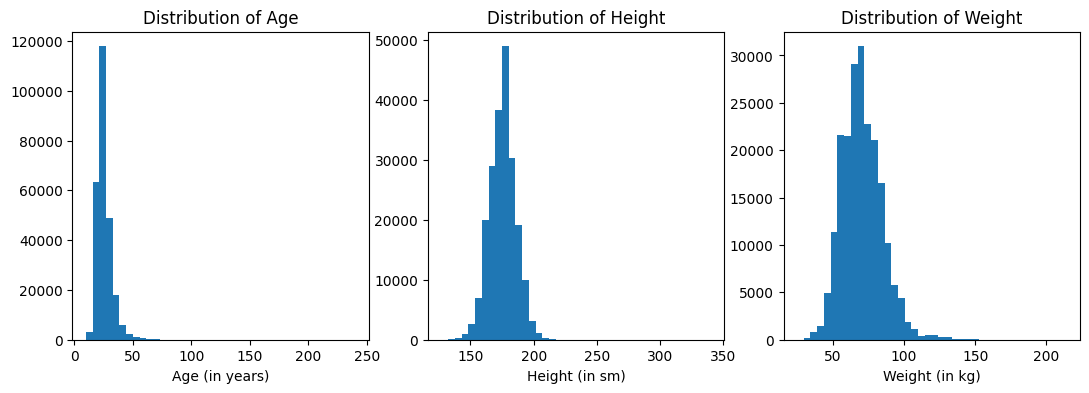

In [269]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

axes[0].hist(data['Age'], bins = 40)
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age (in years)")

axes[1].hist(data['Height'], bins = 40)
axes[1].set_title("Distribution of Height")
axes[1].set_xlabel("Height (in sm)")

axes[2].hist(data['Weight'], bins = 40)
axes[2].set_title("Distribution of Weight")
axes[2].set_xlabel("Weight (in kg)")

There are a lot of NA values, so we can't remove them (we will lost many observations).

Fill NA in variables **Age, Height, Weight** with their **medians**:

In [270]:
data_men = data[(data['Sex'] == 0) | (data['Sex'] == 2)]
data_women = data[data['Sex'] == 1]

In [271]:
data_men['Age'] = data_men['Age'].fillna(data_men['Age'].median())
data_women['Age'] = data_women['Age'].fillna(data_women['Age'].median())

data_men['Height'] = data_men['Height'].fillna(data_men['Height'].median())
data_women['Height'] = data_women['Height'].fillna(data_women['Height'].median())

data_men['Weight'] = data_men['Weight'].fillna(data_men['Weight'].median())
data_women['Weight'] = data_women['Weight'].fillna(data_women['Weight'].median())

/var/folders/_y/cf4dygc14qx9g7l_tls72w940000gn/T/ipykernel_625/2133159366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_men['Age'] = data_men['Age'].fillna(data_men['Age'].median())
/var/folders/_y/cf4dygc14qx9g7l_tls72w940000gn/T/ipykernel_625/2133159366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_women['Age'] = data_women['Age'].fillna(data_women['Age'].median())
/var/folders/_y/cf4dygc14qx9g7l_tls72w940000gn/T/ipykernel_625/2133159366.py:4: SettingWithCopyWarning: 
A value is tryi

In [272]:
data[(data['Sex'] == 0) | (data['Sex'] == 2)] = data_men
data[data['Sex'] == 1] = data_women

There are **no NA values** in our data frame!

### Memory optimization

Then we can convert type int64 to int8 for variables **Sex, Season, Year**

In [273]:
data["Year"] = data["Year"].astype(np.int16)
data["Sex"] = data["Sex"].astype(np.int8)
data["Season"] = data["Season"].astype(np.int8)
data["Medal"] = data["Medal"].astype(np.int8)

# Tasks

### 3. Age of the youngest athletes at the 1992 Olympics:

In [274]:
data1992 = data[data['Year'] == 1992]

In [275]:
data1992_male = data1992[data1992['Sex'] == 0]
data1992_female = data1992[data1992['Sex'] == 1]

In [276]:
data1992_male['Age'].min()

11.0

In [277]:
data1992_female['Age'].min()

12.0

Minimum age for women at the 1992 Olympics is **12 years old**, for men - **11 years old**.

### 4. Mean and standard deviation of the Height variable for athletes of each gender:

In [278]:
data[data['Sex'] == 0]['Height'].mean().round(2)

178.9

In [279]:
data[data['Sex'] == 1]['Height'].mean().round(2)

167.86

In [280]:
data[data['Sex'] == 0]['Height'].std().round(2)

8.0

In [281]:
data[data['Sex'] == 1]['Height'].std().round(2)

8.37

**Mean value** of height for men = 178.9, for women = 167.9;\
**Standard deviation value** of height for men = 8.0, for women = 8.37

### 5. Mean and standard deviation of the height variable for female tennis players at the 2000 Olympics:

In [282]:
data_withoutna_HW[(data_withoutna_HW['Sex'] == 1) & 
                  (data_withoutna_HW['Sport'] == 'Tennis') & 
                 (data_withoutna_HW['Year'] == 2000)]['Height'].mean().round(1)

171.8

In [283]:
data_withoutna_HW[(data_withoutna_HW['Sex'] == 1) & 
                  (data_withoutna_HW['Sport'] == 'Tennis') & 
                 (data_withoutna_HW['Year'] == 2000)]['Height'].std().round(1)

6.4

**Mean value** of the height variable for female tennis players at the 2000 Olympics = 171.8\
**Standard deviation value** = 6.4

### 6. The sport with the heaviest weightlifter at the 2006 Olympics:

In [284]:
biggest_weight = data_withoutna_HW[data_withoutna_HW['Year'] == 2006]['Weight'].max()

In [285]:
data_withoutna_HW[(data_withoutna_HW['Year'] == 2006) &
                  (data_withoutna_HW['Weight'] == biggest_weight)]['Sport']

8102    Skeleton
Name: Sport, dtype: object

The heaviest athlete at the 2006 Olympics participated in the **skeleton**

### 7. Number of gold medals that was won by women from 1980 to 2010:

In [286]:
data[(data['Sex'] == 1) & (data['Year'] >= 1980) & (data['Year'] <= 2010) & (data['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


**No gold medals** that were received by women from 1980 to 2010

### 8. How many times has John Aalberg competed in the Olympics in different years?

In [287]:
len(data[data['Name'] == 'John Aalberg'])

8

**8 times** John Aalberg participated in the Olympic Games in different years

### 9. The least and most represented age groups of athletes at the 2008 Olympics:

In [288]:
data_2008 = data[data['Year'] == 2008]

In [289]:
len(data_2008[(data_2008['Age'] >= 15) & (data_2008['Age'] < 25)])

6296

In [290]:
len(data_2008[(data_2008['Age'] >= 25) & (data_2008['Age'] < 35)])

6367

In [291]:
len(data_2008[(data_2008['Age'] >= 35) & (data_2008['Age'] < 45)])

790

In [292]:
len(data_2008[(data_2008['Age'] >= 45) & (data_2008['Age'] < 55)])

116

**Age group (25 - 35**) are more represented at the 2008 Olympics than others \
**Age group (45 - 55**) are less represented at the 2008 Olympics than others

### 10. Change in the number of sports in the 2002 Olympics compared to the 1994 Olympics:

In [293]:
data[data['Year'] == 1994]['Sport'].nunique()

12

In [294]:
data[data['Year'] == 2002]['Sport'].nunique()

15

In 2002 there were **3 more sports** at the Olympic Games than in 1994

### 11. Top 3 countries for each type of medals for the winter and summer olympiads separately:

In [295]:
data_summer = data[data['Season'] == 0]

In [296]:
data_winter = data[data['Season'] == 1]

In [297]:
data_summer[data_summer['Medal'] == 0]['Team'].value_counts().head(3)

United States    2333
Soviet Union      830
Germany           564
Name: Team, dtype: int64

In [298]:
data_summer[data_summer['Medal'] == 1]['Team'].value_counts().head(3)

United States    1241
Soviet Union      635
Great Britain     576
Name: Team, dtype: int64

In [299]:
data_summer[data_summer['Medal'] == 2]['Team'].value_counts().head(3)

United States    1112
Germany           610
Soviet Union      596
Name: Team, dtype: int64

There are gold medals: **2333 in US**, **830 in Soviet Union**, **564 in Germany** during summer Olympics.\
There are silver medals: **1241 in US**, **635 in Soviet Union**, **576 in Great Britain** during summer Olympics.\
There are bronze medals: **1112 in US**, **610 in Germany**, **596 in Soviet Union** during summer Olympics

In [300]:
data_winter[data_winter['Medal'] == 0]['Team'].value_counts().head(3)

Canada          289
Soviet Union    228
Norway          151
Name: Team, dtype: int64

In [301]:
data_winter[data_winter['Medal'] == 1]['Team'].value_counts().head(3)

United States    271
Canada           189
Norway           165
Name: Team, dtype: int64

In [302]:
data_winter[data_winter['Medal'] == 2]['Team'].value_counts().head(3)

Finland    215
Sweden     177
Norway     127
Name: Team, dtype: int64

There are gold medals: **289 in Canada**, **228 in Soviet Union**, **151 in Norway** during winter Olympics.\
There are silver medals: **271 in US**, **189 in Canada**, **165 in Norway** during winter Olympics.\
There are bronze medals: **215 in Finland**, **177 in Sweden**, **127 in Norway** during winter Olympics

### 12. Create a new Height_z_scores variable with standardized Height values:

In [303]:
standard = preprocessing.scale(data['Height'])

In [304]:
len(standard)

271107

In [305]:
data['Height_z_scores'] = standard

In [306]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_z_scores
0,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,3,1.174332
1,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,3,1.174332
2,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Men's 20 kilometres,3,1.174332
3,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,3,1.174332
4,91139,Dmitry Anatolyevich Pantov,0,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994,1,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,3,1.490645


### 13. Min-max normalization for variable Height

In [307]:
scaler = MinMaxScaler()

In [308]:
Height_array = np.array(data['Height'])
Height_array = Height_array.reshape(-1, 1)

In [309]:
print(scaler.fit(Height_array))

MinMaxScaler()


In [310]:
print(scaler.transform(Height_array))

[[0.28169014]
 [0.28169014]
 [0.28169014]
 ...
 [0.23004695]
 [0.27230047]
 [0.27230047]]


In [311]:
data['Height_min_max_scaled'] = scaler.transform(Height_array)

In [312]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_z_scores,Height_min_max_scaled
0,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Men's 10 kilometres Sprint,3,1.174332,0.281690
1,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 ki...,3,1.174332,0.281690
2,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Men's 20 kilometres,3,1.174332,0.281690
3,91138,Anton Dmitriyevich Pantov,0,22.0,187.0,77.0,Kazakhstan,KAZ,2014 Winter,2014,1,Sochi,Biathlon,Biathlon Men's 4 x 7.5 kilometres Relay,3,1.174332,0.281690
4,91139,Dmitry Anatolyevich Pantov,0,24.0,190.0,85.0,Kazakhstan,KAZ,1994 Winter,1994,1,Lillehammer,Biathlon,Biathlon Men's 10 kilometres Sprint,3,1.490645,0.295775


We add a new column with **normalized data of Heights** (Height_min_max_scaled)

### 14. Compare age, height and weight of men and women in winter Olympic games

In [313]:
data_winter_m = data_winter[data_winter['Sex'] == 0]
data_winter_f = data_winter[data_winter['Sex'] == 1]

In [314]:
data_winter_m['Height'].mean()

178.73590371520726

In [315]:
data_winter_m['Height'].median()

179.0

In [316]:
data_winter_m['Weight'].mean()

75.84528431489667

In [317]:
data_men_H = [data_winter_m['Height'].mean(), 
            data_winter_m['Height'].median(), 
            data_winter_m['Height'].min(),
            data_winter_m['Height'].max()]
data_women_H = [data_winter_f['Height'].mean(), 
            data_winter_f['Height'].median(), 
            data_winter_f['Height'].min(),
            data_winter_f['Height'].max()]

In [318]:
data_men_W = [data_winter_m['Weight'].mean(), 
            data_winter_m['Weight'].median(), 
            data_winter_m['Weight'].min(),
            data_winter_m['Weight'].max()]
data_women_W = [data_winter_f['Weight'].mean(), 
            data_winter_f['Weight'].median(), 
            data_winter_f['Weight'].min(),
            data_winter_f['Weight'].max()]

In [319]:
data_men_A = [data_winter_m['Age'].mean(), 
            data_winter_m['Age'].median(), 
            data_winter_m['Age'].min(),
            data_winter_m['Age'].max()]
data_women_A = [data_winter_f['Age'].mean(), 
            data_winter_f['Age'].median(), 
            data_winter_f['Age'].min(),
            data_winter_f['Age'].max()]

In [320]:
data_review = pd.DataFrame(np.array([data_men_H, data_women_H, data_men_W, data_women_W, data_men_A, data_women_A]).T,
                          columns = ['Height men', 'Height women', 'Weight men', 'Weight women', 'Age men', 'Age women'],
                          index = ['Mean', 'Median', 'Min', 'Max'])
data_review = data_review.round(2)

Data frame with **comparison** of age, height and weight (mean, median, min and max values) of men and women in winter Olympic games

In [321]:
data_review

,Height men,Height women,Weight men,Weight women,Age men,Age women
Mean,178.74,166.68,75.85,59.67,25.5,24.01
Median,179.00,168.00,74.00,59.00,25.0,24.00
Min,142.00,137.00,47.00,32.00,12.0,11.00
Max,211.00,194.00,145.00,96.00,58.0,48.00


### 15. Explore variables Team and Medal

Look at countries with **gold medals**:

In [330]:
data[data['Medal'] == 0]['Team'].value_counts()

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
                 ... 
Mozambique          1
Belgium-1           1
Tajikistan          1
Burundi             1
Satchmo             1
Name: Team, Length: 242, dtype: int64

Look at countries with **silver medals**:

In [325]:
data[data['Medal'] == 1]['Team'].value_counts()

United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
                 ... 
Zambia              1
Sunrise             1
Niger               1
Botswana            1
Tonga               1
Name: Team, Length: 273, dtype: int64

Look at countries with **bronze medals**:

In [326]:
data[data['Medal'] == 2]['Team'].value_counts()

United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
                 ... 
Suriname            1
Zimbabwe            1
Djibouti            1
Frimousse           1
Digby               1
Name: Team, Length: 268, dtype: int64

Now we can say that United States has **2 times more medals of all types** than other countries

Try to draw **matrix of correlations**: \
First of all we have to vectorize string variable Team

In [366]:
new_data = data[['Team', 'Medal']]

In [369]:
dict_teams = {v:k for k,v in enumerate(new_data["Team"].unique())}

In [370]:
new_data["Team"].replace(dict_teams, inplace=True)

/var/folders/_y/cf4dygc14qx9g7l_tls72w940000gn/T/ipykernel_625/402241771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Team"].replace(dict_teams, inplace=True)


<AxesSubplot: >

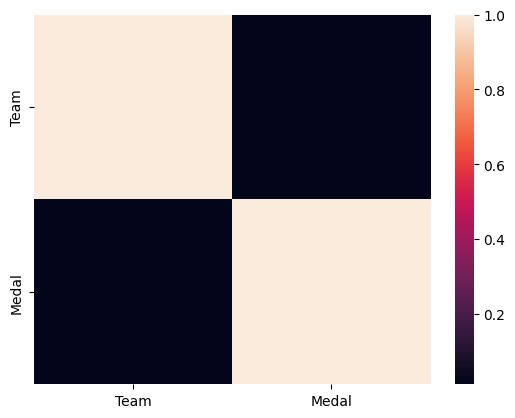

In [376]:
sns.heatmap(new_data.corr())

In [377]:
new_data.corr()

,Team,Medal
Team,1.000000,0.011597
Medal,0.011597,1.000000


Matrix of correlations shows that there are no significant bind between these two variables (Team and Medals)